In [1672]:
import pandas as pd
import numpy as np

### Import dataset

In [1673]:
df = pd.read_csv('./datasets/house_prices.csv', encoding='utf-8-sig')
df.shape

(15327, 17)

In [1674]:
# rename columns
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['title', 'sub_title', 'price', 'address', 'baths', 'land_size', 'beds',
       'house_size', 'location', 'description', 'post_url', 'seller_name',
       'seller_type', 'published_date', 'geo_address', 'lat', 'lon'],
      dtype='object')

In [1675]:
df.head(3)

,title,sub_title,price,address,baths,land_size,beds,house_size,location,description,post_url,seller_name,seller_type,published_date,geo_address,lat,lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha","Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178


In [1676]:
# switch lat and lon columns since they are switched
df = df.rename(columns={'lat': 'lon', 'lon': 'lat'})

 ### Remove irrelevant attributes
The dataset contains platform specific attributes, which does not fit into the general model
- title - title of the post
- sub_title - subtitle of the post
- post_url - url of the post
- seller_name - name of the seller
- seller_type - type of the seller
- description - description of the post

In [1677]:
df = df.drop(columns=['title', 'sub_title', 'post_url', 'seller_name', 'seller_type', 'description'], errors='ignore')
df.shape

(15327, 11)

### Remove redundant attributes
Address, location and geo_address contain the same information. Remove address and location since geo_address is more structured

In [1678]:
df = df.drop(columns=['location'], errors='ignore')
df.shape

(15327, 10)

### remove missing values and duplicates

In [1679]:
print('missing values:\n', df.isna().sum(), sep='')

# drop rows with missing values
df = df.dropna()


missing values:
price                0
address           4136
baths                0
land_size            0
beds                 0
house_size           0
published_date       0
geo_address          0
lon                  0
lat                  0
dtype: int64


In [1680]:
print('duplicated rows:', df.duplicated().sum())

# drop duplicated rows
df.drop_duplicates(inplace=True)

duplicated rows: 373


In [1681]:
df.head()

,price,address,baths,land_size,beds,house_size,published_date,geo_address,lon,lat
0,"Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft",2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,"Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft",2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,"Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft",2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178
3,"Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0 perches,5,"4,000.0 sqft",2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670
4,"Rs 1,300,000",MainRoad Attidiya,1,6.3 perches,2,900.0 sqft,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232


### Concept hierarchy generation
use geo_address to generate a concept hierarchy for the location attribute
- level 1: country
- level 2: district
- level 3: city

In [1682]:
df[['city', 'district', 'country']] = df['geo_address'].str.lower().str.split(',', n=2, expand=True).apply(lambda x: x.str.strip())
df = df.drop(columns=['geo_address'], errors='ignore')

countries = df['country'].unique()
districts = df['district'].unique()
cities = df['city'].unique()

print(f'countries ({len(countries)}): {countries[:5]}')
print(f'districts ({len(districts)}): {districts[:5]}')
print(f'cities ({len(cities)}): {cities[:5]}')

countries (1): ['sri lanka']
districts (24): ['matara' 'colombo' 'gampaha' 'kandy' 'jaffna']
cities (168): ['matara city' 'athurugiriya' 'kelaniya' 'colombo 6' 'dehiwala']


In [1683]:
# remove country column since all values are sri lanka
df = df.drop(columns=['country'], errors='ignore')

### Data type conversion and unit conversion

#### processing price, house_size and land_size

In [1684]:
# split units and values

temp_df = pd.DataFrame()

temp_df[['price_unit','price']] = df['price'].str.split(' ', n=1, expand=True)
temp_df[['house_size', 'house_size_unit']] = df['house_size'].str.split(' ', n=1, expand=True)
temp_df[['land_size', 'land_size_unit']] = df['land_size'].str.split(' ', n=1, expand=True)

temp_df.head()


,price_unit,price,house_size,house_size_unit,land_size,land_size_unit
0,Rs,"5,400,000","1,600.0",sqft,50.0,perches
1,Rs,"16,800,000","1,480.0",sqft,8.0,perches
2,Rs,"20,000,000","2,800.0",sqft,20.0,perches
3,Rs,"187,000,000","4,000.0",sqft,22.0,perches
4,Rs,"1,300,000",900.0,sqft,6.3,perches


In [1685]:
# remove commas
temp_df['price'] = temp_df['price'].str.replace(',', '')
temp_df['house_size'] = temp_df['house_size'].str.replace(',', '')
temp_df['land_size'] = temp_df['land_size'].str.replace(',', '')

# convert to numeric
temp_df['price'] = pd.to_numeric(temp_df['price'])
temp_df['house_size'] = pd.to_numeric(temp_df['house_size'])
temp_df['land_size'] = pd.to_numeric(temp_df['land_size'])

temp_df.head()

,price_unit,price,house_size,house_size_unit,land_size,land_size_unit
0,Rs,5400000,1600.0,sqft,50.0,perches
1,Rs,16800000,1480.0,sqft,8.0,perches
2,Rs,20000000,2800.0,sqft,20.0,perches
3,Rs,187000000,4000.0,sqft,22.0,perches
4,Rs,1300000,900.0,sqft,6.3,perches


In [1686]:
# analyze units
print('price', temp_df['price_unit'].unique())
print('house_size', temp_df['house_size_unit'].unique())
print('land_size', temp_df['land_size_unit'].unique())

price ['Rs']
house_size ['sqft']
land_size ['perches' 'acres']


In [1687]:
# convert acres to perches
temp_df.loc[temp_df['land_size_unit'] == 'acres', 'land_size'] = temp_df['land_size'] * 160

temp_df.head()

,price_unit,price,house_size,house_size_unit,land_size,land_size_unit
0,Rs,5400000,1600.0,sqft,50.0,perches
1,Rs,16800000,1480.0,sqft,8.0,perches
2,Rs,20000000,2800.0,sqft,20.0,perches
3,Rs,187000000,4000.0,sqft,22.0,perches
4,Rs,1300000,900.0,sqft,6.3,perches


In [1688]:
# processed values to original dataframe
df[['price', 'house_size', 'land_size']] = temp_df[['price', 'house_size', 'land_size']]

del temp_df

df[['price', 'house_size', 'land_size']].head()


,price,house_size,land_size
0,5400000,1600.0,50.0
1,16800000,1480.0,8.0
2,20000000,2800.0,20.0
3,187000000,4000.0,22.0
4,1300000,900.0,6.3


#### processing beds and baths

In [1689]:
# find non numeric values

beds_non_numeric_mask = ~df['beds'].str.isnumeric()
baths_non_numeric_mask = ~df['baths'].str.isnumeric()

print('beds: ', df[beds_non_numeric_mask]['beds'].unique())
print('baths: ', df[baths_non_numeric_mask]['baths'].unique())

beds:  ['10+']
baths:  ['10+']


In [1690]:
# replace x+ with x + 1
df.loc[beds_non_numeric_mask, 'beds'] = df.loc[beds_non_numeric_mask, 'beds'].str.replace('+', '').astype('int') + 1
df.loc[baths_non_numeric_mask, 'baths'] = df.loc[baths_non_numeric_mask, 'baths'].str.replace('+', '').astype('int') + 1

# convert to numeric
df['beds'] = pd.to_numeric(df['beds'], downcast='integer')
df['baths'] = pd.to_numeric(df['baths'], downcast='integer')

print('beds: ', df['beds'].unique())
print('baths: ', df['baths'].unique())

beds:  [ 3  5  2  4 11  9  8  6  7  1 10]
baths:  [ 1  3  2  5  4 11  7  6  8 10  9]


#### processing published_date

In [1691]:
df['published_date'].head()

0    2021-11-06 14:32:00
1    2021-10-24 07:27:00
2    2021-11-17 17:19:00
3    2021-11-17 17:07:00
4    2021-11-17 17:06:00
Name: published_date, dtype: object

In [1692]:
df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d %H:%M:%S')
df['published_date'].head()

0   2021-11-06 14:32:00
1   2021-10-24 07:27:00
2   2021-11-17 17:19:00
3   2021-11-17 17:07:00
4   2021-11-17 17:06:00
Name: published_date, dtype: datetime64[ns]

### Outlier detection

In [1693]:
# generate features for outlier detection

temp_df = df.copy()

temp_df['price_per_land_size'] = df['price'] / df['land_size']
temp_df['price_per_house_size'] = df['price'] / df['house_size']
temp_df['baths_per_bed'] = df['baths'] / df['beds']
temp_df['sqft_per_bed'] = df['house_size'] / df['beds']

#### Using domain knowledge for outlier detection

In [1694]:
# houses with 0 values for beds, land_size, house_size
zero_values_mask = (df['beds'] == 0) | (df['land_size'] == 0) | (df['house_size'] == 0)

# houses with less than 5 perches
land_size_mask = df['land_size'] < 5

# houses with less than 100 sqft per bed or more than 1000 sqft per bed
sqft_per_bed_mask = (temp_df['sqft_per_bed'] < 100) | (temp_df['sqft_per_bed'] > 1000)

# houses with more than 1.5 bath per bed
baths_per_bed_mask = temp_df['baths_per_bed'] > 1.5

# houses with less than 75,000 LKR per perch
price_per_land_size_mask = temp_df['price_per_land_size'] < 50000

# TODO : lat lon outliers

# print outliers
print('zero values: ', zero_values_mask.sum())
print('land size: ', land_size_mask.sum())
print('sqft per bed: ', sqft_per_bed_mask.sum())
print('baths per bed: ', baths_per_bed_mask.sum())
print('price per land size: ', price_per_land_size_mask.sum())

# combine outlier masks
outlier_mask_dk = zero_values_mask | land_size_mask | sqft_per_bed_mask | baths_per_bed_mask | price_per_land_size_mask
print('\ntotal outliers: ', outlier_mask_dk.sum())


zero values:  2
land size:  351
sqft per bed:  767
baths per bed:  18
price per land size:  47

total outliers:  1149


In [1695]:
# outlier percentage
print(f'outlier percentage: {outlier_mask_dk.sum() / len(df) * 100:.2f}%')

outlier percentage: 10.62%


In [1696]:
# drop outliers
df = df[~outlier_mask_dk]
df.shape

(9669, 11)

#### Using Z-score for outlier detection

In [1697]:
def detect_outliers(df, threshold, features):
    outlier_mask = None

    for f in features:
        mean = np.mean(df[f])
        std = np.std(df[f])
        abs_z_score = np.abs((df[f] - mean) / std)
        mask = abs_z_score > threshold
        outlier_mask = mask if outlier_mask is None else outlier_mask | mask

    return outlier_mask

# detect outliers using z-score with 2 standard deviations
outlier_mask_zs = detect_outliers(temp_df, 2, ['price_per_land_size', 'price_per_house_size', 'baths_per_bed', 'sqft_per_bed', 'land_size', 'house_size', 'price'])

print('total outliers: ', outlier_mask_zs.sum())

total outliers:  775


c:\Users\USER\Documents\SLIIT\fdm mini project\.venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [1698]:
# outlier percentage
print(f'outlier percentage: {outlier_mask_zs.sum() / len(outlier_mask_dk) * 100:.2f}%')

outlier percentage: 7.16%


In [1699]:
# drop outliers
df = df[~outlier_mask_zs]
df.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_29236\2140630139.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outlier_mask_zs]


(9266, 11)

### feature generation

#### geocoding the address

In [1700]:
from dotenv import load_dotenv
import os
import googlemaps

load_dotenv()

GOOGLE_MAPS_API_KEY = os.getenv('GOOGLE_MAPS_API_KEY')

gmaps = googlemaps.Client(key=GOOGLE_MAPS_API_KEY)

def get_geocode(address):
    geocode_result = gmaps.geocode(address)

    if len(geocode_result) > 0:
        return geocode_result
    else:
        return None
    


In [1701]:
# unique all 3 columns combined
df_geocoding = df[['address', 'city', 'district']].copy()
df_geocoding = df_geocoding.drop_duplicates()

def edit_address(x):
    addr = x['address'].encode('ascii', 'ignore').decode('ascii')
    addr = addr.replace('.', '')
    addr = addr.split(',')
    addr = [a.strip() for a in addr]
    addr = [a for a in addr if len(a) > 1]
    return ', '.join(addr)

df_geocoding['address'] = df_geocoding.apply(edit_address, axis=1)

# remove addresses with less than 2 words and words with less than 2 characters
df_geocoding = df_geocoding[df_geocoding['address'].str.split().str.len() > 1]

df_geocoding.sort_values(by=['address'], key=lambda x: x.str.len(), inplace=True, ascending=False)

df_geocoding['address'] = df_geocoding['address'] + ', ' + df_geocoding['city'] + ', ' + df_geocoding['district'] + ', sri lanka'

df_geocoding.drop(columns=['city', 'district'], inplace=True)


In [1702]:
# check if geocoding file exists
import os.path

if os.path.isfile('./datasets/geocoding.csv'):
    df_file = pd.read_csv('./datasets/geocoding.csv')
else:
    df_file = pd.DataFrame(columns=['address', 'lat', 'lon'])

count = 0

def apply_geocode(row):
    global count
    if df_file[df_file['address'] == row['address']].shape[0] > 0:
        return [
            df_file.loc[df_file['address'] == row['address'], 'lat'].values[0],
            df_file.loc[df_file['address'] == row['address'], 'lon'].values[0]
        ]
    else:
        count += 1
        geocode_result = get_geocode(row['address'])

        if geocode_result is not None:
            lat = geocode_result[0]['geometry']['location']['lat']
            lon = geocode_result[0]['geometry']['location']['lng']

            return [lat, lon]
        else:
            return [None, None]
        
df_geocoding[['lat', 'lon']] = df_geocoding.apply(apply_geocode, axis=1, result_type='expand')

df_geocoding.to_csv('./datasets/geocoding.csv', index=False)

print('api calls: ', count)

api calls:  0


In [1703]:
df['address'] = df.apply(edit_address, axis=1)
df['address'] = df['address'] + ', ' + df['city'] + ', ' + df['district'] + ', sri lanka'

count = 0
def load_from_geocodes(x):
    global count
    if df_geocoding[df_geocoding['address'] == x['address']].shape[0] > 0:
        count += 1
        return [
            df_geocoding.loc[df_geocoding['address'] == x['address'], 'lat'].values[0],
            df_geocoding.loc[df_geocoding['address'] == x['address'], 'lon'].values[0]
        ]
    else:
        return [x['lat'], x['lon']]
    
df[['lat', 'lon']] = df.apply(load_from_geocodes, axis=1, result_type='expand')
df = df.drop(columns=['address'])

print('coordinates applied: ', count)

coordinates applied:  6488


In [1704]:
def generate_features(df):
    df['sqft_per_bed'] = df['house_size'] / df['beds']
    df['house_land_ratio'] = np.ceil(df['house_size'] / df['land_size'] / 272.25 )
    df['baths_per_bed'] = df['baths'] / df['beds']
    
    return df

df = generate_features(df)


### Data Analysis

In [1705]:
df.head()

,price,baths,land_size,beds,house_size,published_date,lon,lat,city,district,sqft_per_bed,house_land_ratio,baths_per_bed
0,5400000,1,50.0,3,1600.0,2021-11-06 14:32:00,80.684012,6.078701,matara city,matara,533.333333,1.0,0.333333
1,16800000,3,8.0,3,1480.0,2021-10-24 07:27:00,79.861243,6.927079,athurugiriya,colombo,493.333333,1.0,1.000000
2,20000000,2,20.0,3,2800.0,2021-11-17 17:19:00,79.937397,6.990475,kelaniya,gampaha,933.333333,1.0,0.666667
4,1300000,1,6.3,2,900.0,2021-11-17 17:06:00,79.883809,6.827589,dehiwala,colombo,450.000000,1.0,0.500000
7,16700000,3,9.0,3,1400.0,2021-11-17 16:56:00,79.955940,6.799431,piliyandala,colombo,466.666667,1.0,1.000000


In [1706]:
temp_df = df.copy()
temp_df['price_per_house_size'] = temp_df['price'] / temp_df['house_size']

#### correlation analysis

<Axes: title={'center': 'Correlation Heatmap'}>

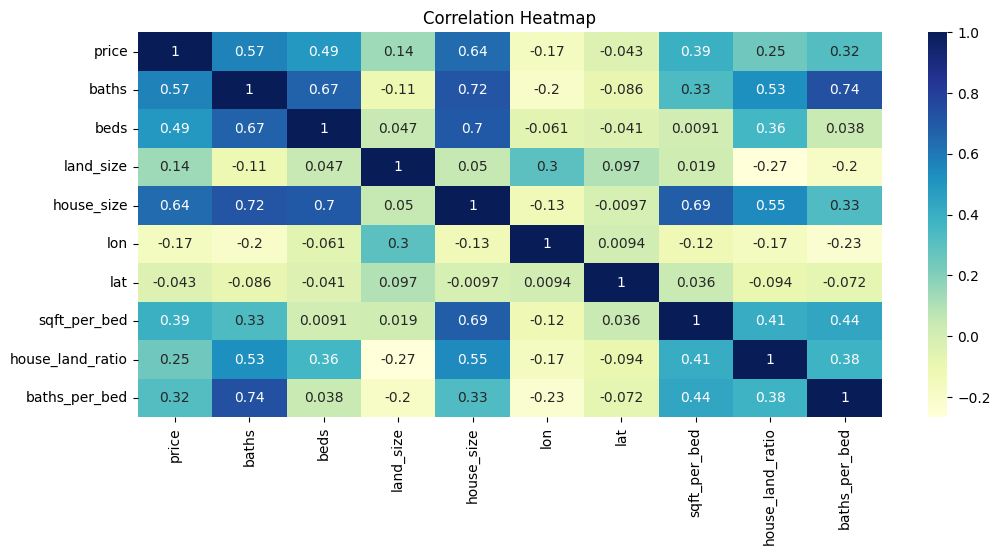

In [1707]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['price','baths', 'beds', 'land_size', 'house_size', 'lon', 'lat', 'sqft_per_bed', 'house_land_ratio', 'baths_per_bed']].corr()

plt.figure(figsize=(12,5))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='YlGnBu')

#### published date analysis

In [1708]:
# analyze published date

temp_df['published_year'] = temp_df['published_date'].dt.year
temp_df['published_month'] = temp_df['published_date'].dt.month
temp_df['published_day'] = temp_df['published_date'].dt.day
temp_df['published_hour'] = temp_df['published_date'].dt.hour
temp_df['published_day_of_week'] = temp_df['published_date'].dt.dayofweek

# print unique values
print('published_year: ', sorted(temp_df['published_year'].unique()))
print('published_month: ', sorted(temp_df['published_month'].unique()))
print('published_day: ', sorted(temp_df['published_day'].unique()))
print('published_hour: ', sorted(temp_df['published_hour'].unique()))
print('published_day_of_week: ', sorted(temp_df['published_day_of_week'].unique()))

published_year:  [2021]
published_month:  [9, 10, 11]
published_day:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
published_hour:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
published_day_of_week:  [0, 1, 2, 3, 4, 5, 6]


In [1709]:
# drop published_year since all values are 2021
temp_df = temp_df.drop(columns=['published_year'], errors='ignore')

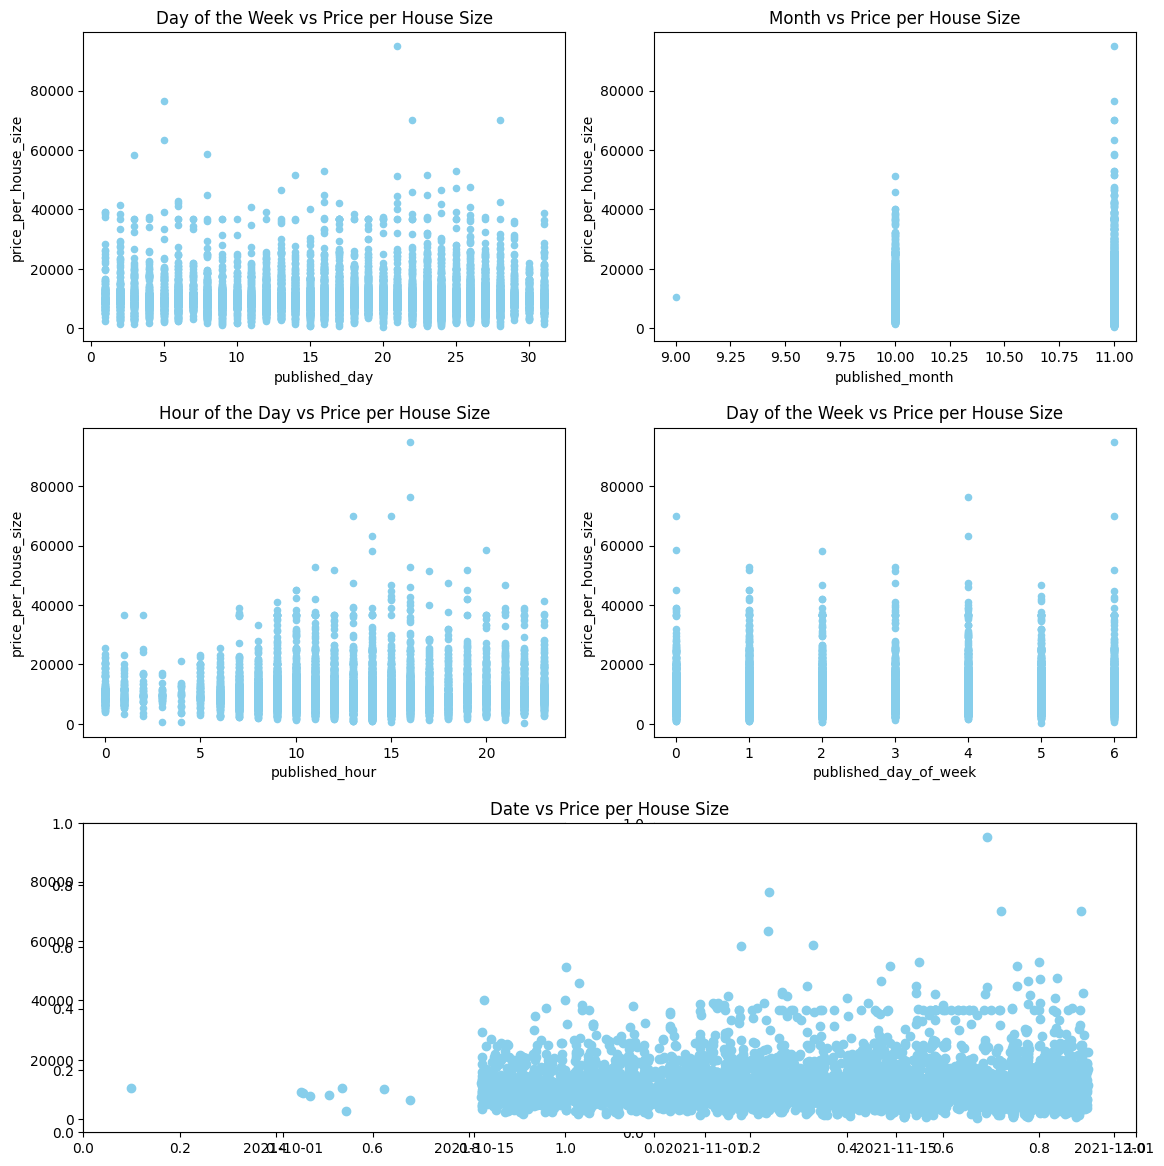

In [1710]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Scatter plot 1 - published_day vs price_per_house_size
temp_df.plot(kind='scatter', x='published_day', y='price_per_house_size', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Day of the Week vs Price per House Size')

# Scatter plot 2 - published_month vs price_per_house_size
temp_df.plot(kind='scatter', x='published_month', y='price_per_house_size', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Month vs Price per House Size')

# Scatter plot 3 - published_hour vs price_per_house_size
temp_df.plot(kind='scatter', x='published_hour', y='price_per_house_size', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Hour of the Day vs Price per House Size')

# Scatter plot 4 - published_day_of_week vs price_per_house_size
temp_df.plot(kind='scatter', x='published_day_of_week', y='price_per_house_size', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Day of the Week vs Price per House Size')


# Scatter plot 5 - published_date vs price_per_house_size
plt.subplot2grid((3,2), (2,0), colspan=2)
plt.scatter(x=df['published_date'], y=temp_df['price_per_house_size'], color='skyblue')
plt.title('Date vs Price per House Size')

plt.tight_layout()
plt.show()


#### coordinate analysis

In [1711]:
# get unique coordinates
unique_coordinates = temp_df[['lon', 'lat']].drop_duplicates()
print(f'coordinates {len(unique_coordinates)}/{len(df)}')

coordinates 1629/9266


Coordinates provided in the dataset are approximate coordinates. There are only 141 unique records out of 12311 records.

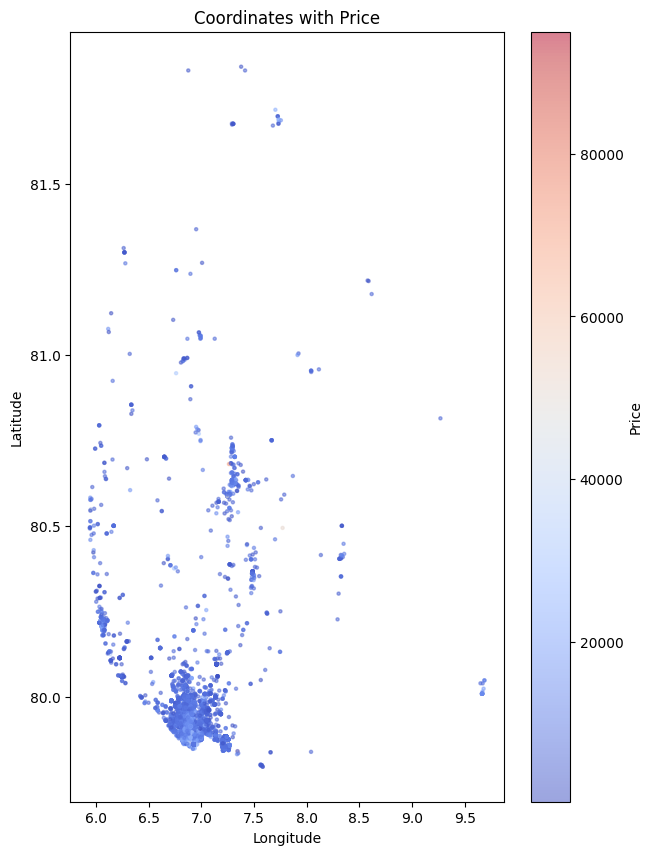

In [1712]:
# Scatter plot with color representing price
plt.figure(figsize=(7, 10))
plt.scatter(temp_df['lat'], temp_df['lon'], c=temp_df['price_per_house_size'], cmap='coolwarm', s=5, alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates with Price')
plt.show()


#### district and city analysis

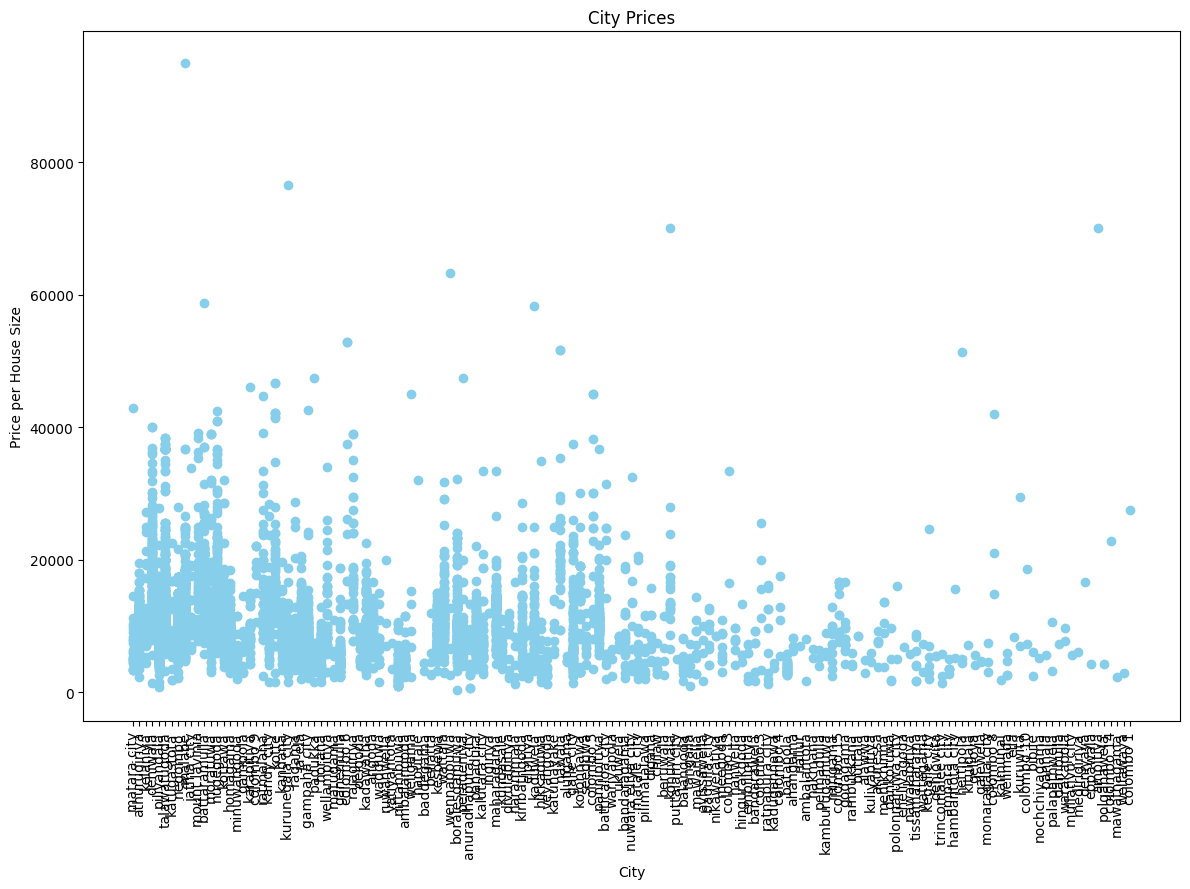

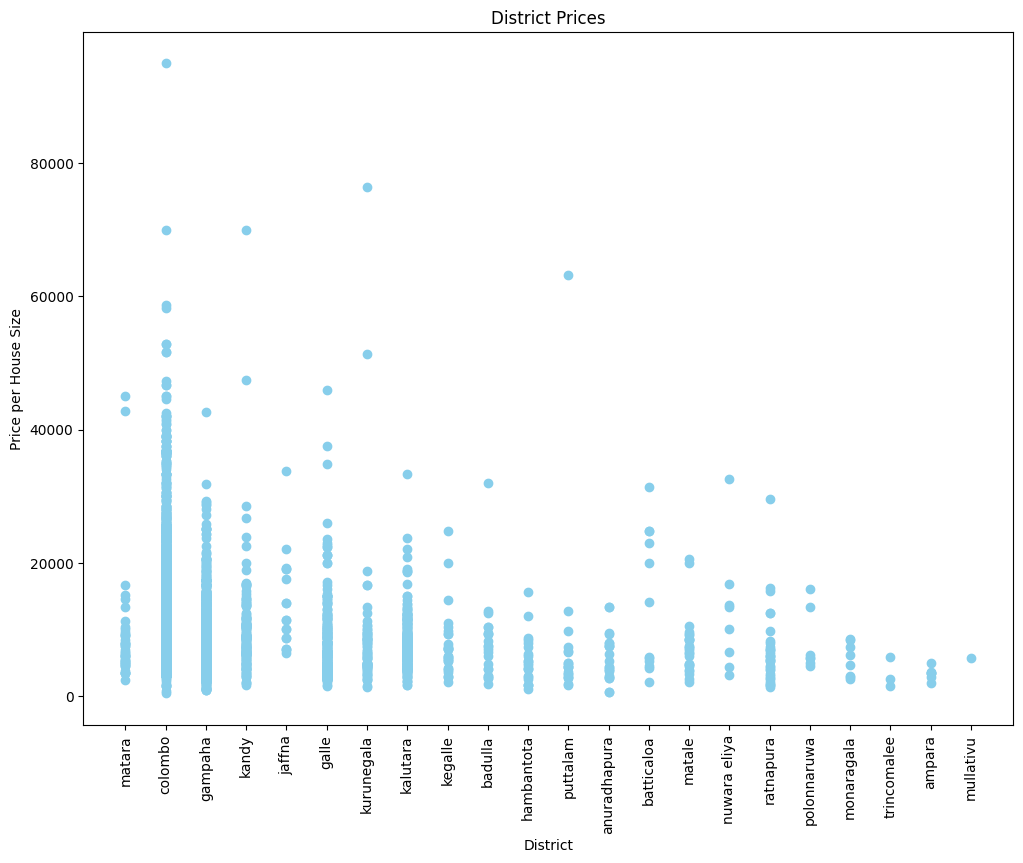

In [1713]:
import matplotlib.pyplot as plt

# cities
plt.figure(figsize=(12, 9))
plt.scatter(temp_df['city'], temp_df['price_per_house_size'], color='skyblue')
plt.title('City Prices')
plt.xlabel('City')
plt.ylabel('Price per House Size')
plt.xticks(rotation=90)
plt.tight_layout()

# districts
plt.figure(figsize=(12, 9))
plt.scatter(temp_df['district'], temp_df['price_per_house_size'], color='skyblue')
plt.title('District Prices')
plt.xlabel('District')
plt.ylabel('Price per House Size')
plt.xticks(rotation=90)



# Display the chart
plt.show()


#### beds and baths analysis

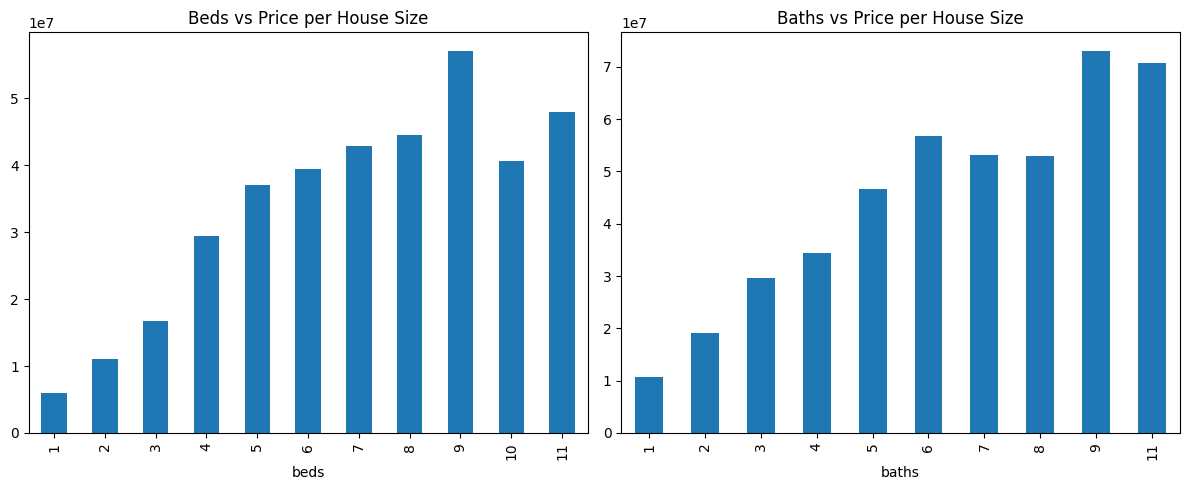

In [1714]:
#beds and baths anlysis with price separately with two different plots in 2 columns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot 1 - beds vs price_per_house_size
temp_df.groupby('beds')['price'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Beds vs Price per House Size')

# Scatter plot 2 - baths vs price_per_house_size
temp_df.groupby('baths')['price'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Baths vs Price per House Size')

plt.tight_layout()
plt.show()


#### house size and land size analysis

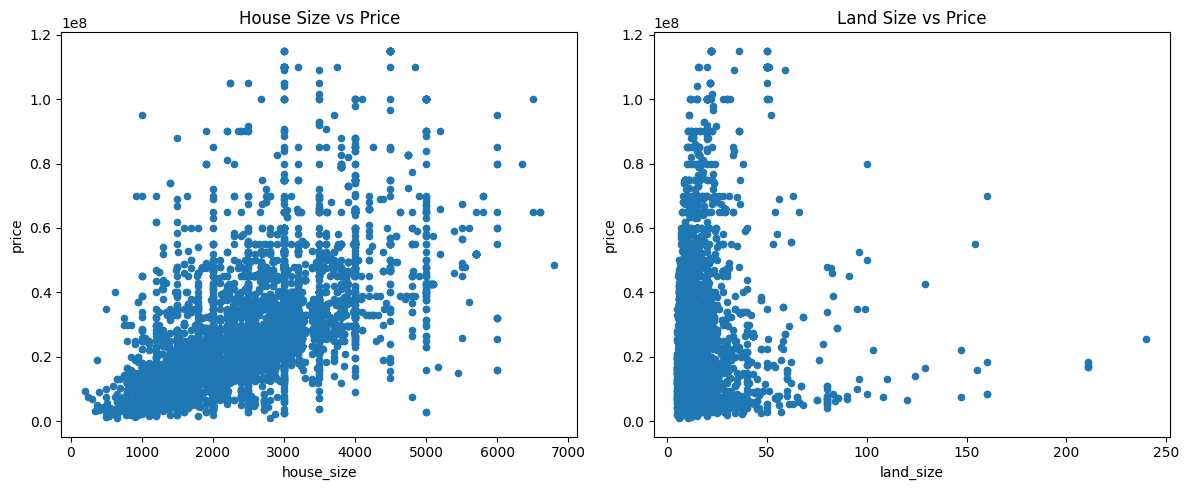

In [1715]:
# house size and land size analysis with price separately with two different plots in 2 columns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot 1 - house_size vs price_per_house_size
temp_df.plot(kind='scatter', x='house_size', y='price', ax=axes[0])
axes[0].set_title('House Size vs Price')

# Scatter plot 2 - land_size vs price_per_house_size
temp_df.plot(kind='scatter', x='land_size', y='price', ax=axes[1])
axes[1].set_title('Land Size vs Price')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_29236\3494434767.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df.groupby(pd.qcut(df['house_size'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_29236\3494434767.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df.groupby(pd.qcut(df['land_size'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[1])


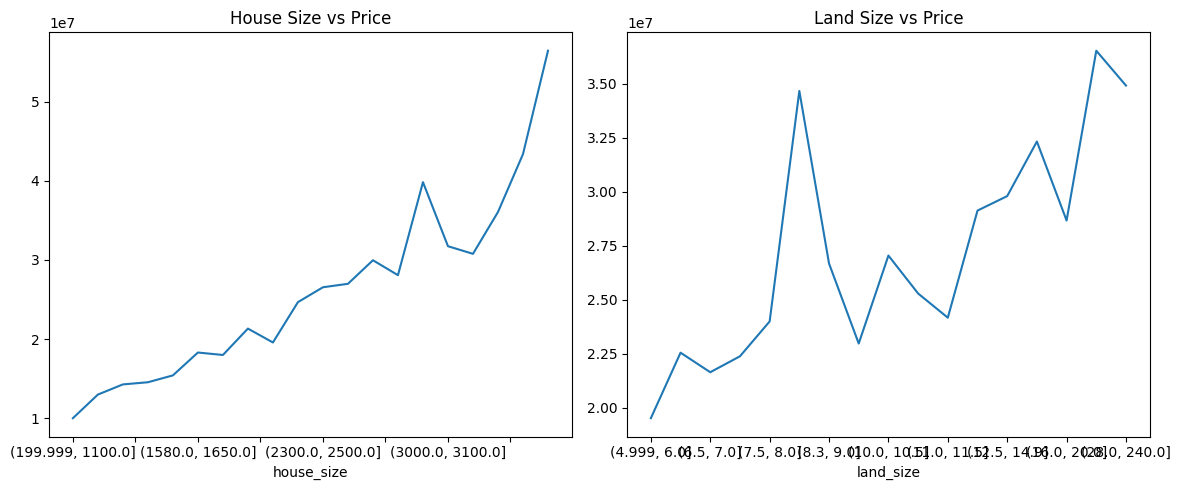

In [1716]:
#groupby bins of house size and land size and plot the mean price
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot 1 - house_size vs price_per_house_size
temp_df.groupby(pd.qcut(df['house_size'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[0])
axes[0].set_title('House Size vs Price')

# Scatter plot 2 - land_size vs price_per_house_size
temp_df.groupby(pd.qcut(df['land_size'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[1])
axes[1].set_title('Land Size vs Price')

plt.tight_layout()
plt.show()

#### Sqft per bed analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_29236\272228697.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(temp_df['sqft_per_bed'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[1])


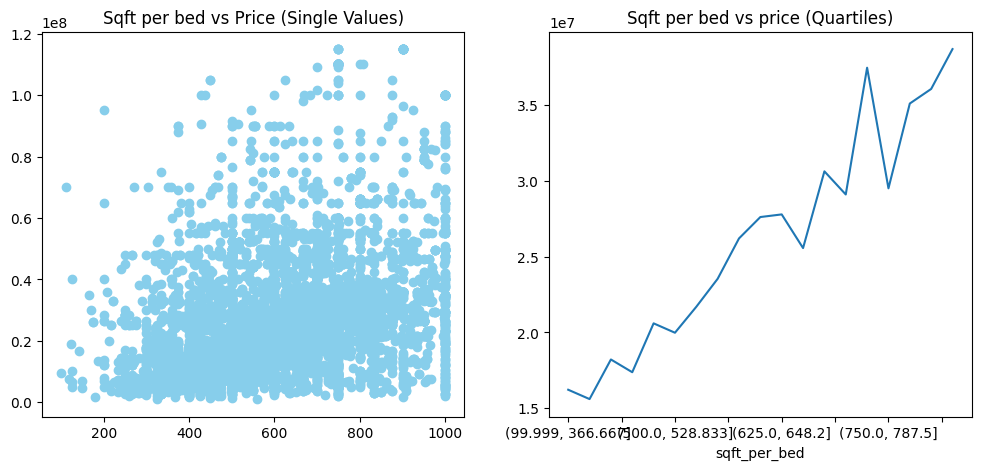

In [1717]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(temp_df['sqft_per_bed'], temp_df['price'], color='skyblue')
axes[0].set_title('Sqft per bed vs Price (Single Values)')

df.groupby(pd.qcut(temp_df['sqft_per_bed'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[1])
axes[1].set_title('Sqft per bed vs price (Quartiles)')

plt.show()

#### bath per bed analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_29236\1951489491.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(temp_df['baths_per_bed'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[1])


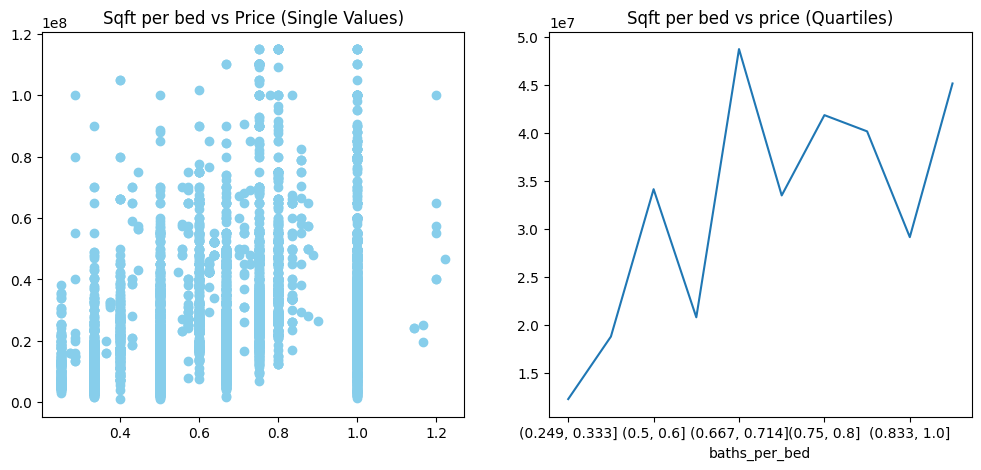

In [1718]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(temp_df['baths_per_bed'], df['price'], color='skyblue')
axes[0].set_title('Sqft per bed vs Price (Single Values)')

df.groupby(pd.qcut(temp_df['baths_per_bed'], q=20, duplicates='drop'))['price'].mean().plot(kind='line', ax=axes[1])
axes[1].set_title('Sqft per bed vs price (Quartiles)')

plt.show()

#### house land ratio analysis

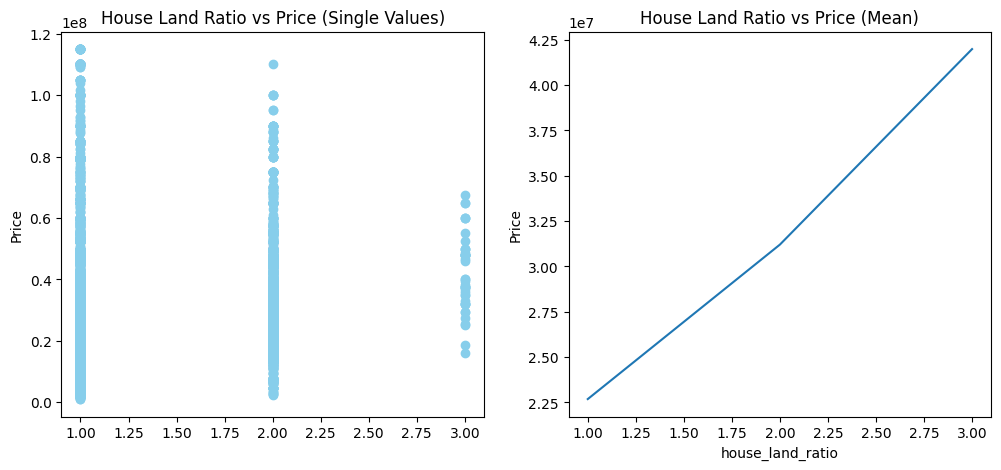

In [1719]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(temp_df['house_land_ratio'], temp_df['price'], color='skyblue')
axes[0].set_title('House Land Ratio vs Price (Single Values)')
axes[0].set_ylabel('Price')

temp_df.groupby('house_land_ratio')['price'].mean().plot(kind='line', ax=axes[1])
axes[1].set_title('House Land Ratio vs Price (Mean)')
axes[1].set_ylabel('Price')

plt.show()

### Normalization

In [1720]:
column_info = df.describe()
column_info

,price,baths,land_size,beds,house_size,published_date,lon,lat,sqft_per_bed,house_land_ratio,baths_per_bed
count,9.266000e+03,9266.000000,9266.000000,9266.000000,9266.000000,9266,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000
mean,2.585874e+07,2.773257,12.620084,3.867365,2361.346359,2021-11-10 09:15:52.145477888,79.974472,6.918181,610.121373,1.372005,0.714442
min,9.800000e+05,1.000000,5.000000,1.000000,200.000000,2021-09-19 21:01:00,79.795934,5.940917,100.000000,1.000000,0.250000
25%,1.500000e+07,2.000000,8.000000,3.000000,1580.000000,2021-10-31 10:37:15,79.898465,6.801844,500.000000,1.000000,0.500000
50%,2.350000e+07,3.000000,10.000000,4.000000,2300.000000,2021-11-12 14:16:00,79.926341,6.877014,600.000000,1.000000,0.714286
75%,3.000000e+07,4.000000,12.500000,4.000000,3000.000000,2021-11-20 18:57:00,79.971753,6.999950,724.000000,2.000000,1.000000
max,1.150000e+08,11.000000,240.000000,11.000000,6800.000000,2021-11-29 01:35:00,81.841562,9.686982,1000.000000,3.000000,1.222222
std,1.699785e+07,1.197795,11.263153,1.195331,938.765778,NaN,0.182446,0.268407,164.502216,0.493093,0.228075


In [1721]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# masks
continuous_features = (df.dtypes == np.float64) | (df.dtypes == np.int64)
discrete_features = df.dtypes == np.int8

continuous_features = continuous_features[continuous_features==True].index.tolist()
continuous_features.remove('price')
discrete_features = discrete_features[discrete_features==True].index.tolist()

df[continuous_features] = std_scaler.fit_transform(df[continuous_features])
df[discrete_features] = minmax_scaler.fit_transform(df[discrete_features])

# TODO : lat lon max min scaler

df.describe()

,price,baths,land_size,beds,house_size,published_date,lon,lat,sqft_per_bed,house_land_ratio,baths_per_bed
count,9.266000e+03,9266.000000,9.266000e+03,9266.000000,9.266000e+03,9266,9.266000e+03,9.266000e+03,9.266000e+03,9.266000e+03,9.266000e+03
mean,2.585874e+07,0.177326,9.968763e-17,0.286736,1.426300e-16,2021-11-10 09:15:52.145477888,1.450838e-15,-5.533430e-15,-1.533656e-17,1.104232e-16,-2.300484e-17
min,9.800000e+05,0.000000,-6.765863e-01,0.000000,-2.302452e+00,2021-09-19 21:01:00,-9.786334e-01,-3.641175e+00,-3.101167e+00,-7.544729e-01,-2.036467e+00
25%,1.500000e+07,0.100000,-4.102167e-01,0.200000,-8.323573e-01,2021-10-31 10:37:15,-4.166224e-01,-4.334603e-01,-6.694579e-01,-7.544729e-01,-9.402781e-01
50%,2.350000e+07,0.200000,-2.326369e-01,0.300000,-6.535141e-02,2021-11-12 14:16:00,-2.638243e-01,-1.533852e-01,-6.153059e-02,-7.544729e-01,-6.872289e-04
75%,3.000000e+07,0.300000,-1.066226e-02,0.300000,6.803487e-01,2021-11-20 18:57:00,-1.490543e-02,3.046605e-01,6.922993e-01,1.273652e+00,1.252101e+00
max,1.150000e+08,1.000000,2.018903e+01,1.000000,4.728435e+00,2021-11-29 01:35:00,1.023421e+01,1.031623e+01,2.370179e+00,3.301776e+00,2.226491e+00
std,1.699785e+07,0.119779,1.000054e+00,0.119533,1.000054e+00,NaN,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00


### Encoding categorical attributes

In [1722]:
# pick districts with more than 10 houses as features
district_freq = df.groupby('district')['price'].count()
district_freq = district_freq[district_freq > 10]
df.loc[~df['district'].isin(district_freq.index.tolist()), 'district'] = 'other_district'
# district_freq = district_freq.sort_values(ascending=False).head(10)
# df.loc[~df['district'].isin(district_freq.index.tolist()), 'district'] = 'other_district'

# pick cities with more than 10 houses as features
city_freq = df.groupby('city')['price'].count()
city_freq = city_freq[city_freq > 10]
df.loc[~df['city'].isin(city_freq.index.tolist()), 'city'] = 'other_city'
# city_freq = city_freq.sort_values(ascending=False).head(20)
# df.loc[~df['city'].isin(city_freq.index.tolist()), 'city'] = 'other_city'

districts = df['district'].unique()
cities = df['city'].unique()

print(f'districts ({len(districts)}): {districts[:5]}')
print(f'cities ({len(cities)}): {cities[:5]}')

# one hot encoding
df = pd.get_dummies(df, columns=['city'], prefix='city', prefix_sep='_')
df = pd.get_dummies(df, columns=['district'], prefix='district', prefix_sep='_')
df = df.drop(columns=['nearest_district'], errors='ignore')



districts (17): ['matara' 'colombo' 'gampaha' 'kandy' 'jaffna']
cities (67): ['matara city' 'athurugiriya' 'kelaniya' 'dehiwala' 'piliyandala']


### Training model

In [1723]:
df.columns

Index(['price', 'baths', 'land_size', 'beds', 'house_size', 'published_date',
       'lon', 'lat', 'sqft_per_bed', 'house_land_ratio', 'baths_per_bed',
       'city_ambalangoda', 'city_angoda', 'city_anuradhapura city',
       'city_athurugiriya', 'city_balangoda', 'city_bandaragama',
       'city_batapola', 'city_battaramulla', 'city_batticaloa city',
       'city_boralesgamuwa', 'city_colombo 15', 'city_colombo 5',
       'city_dehiwala', 'city_delgoda', 'city_divulapitiya', 'city_elpitiya',
       'city_galle city', 'city_gampaha city', 'city_ganemulla',
       'city_godagama', 'city_hikkaduwa', 'city_homagama', 'city_horana',
       'city_ja-ela', 'city_jaffna city', 'city_kadawatha', 'city_kaduwela',
       'city_kalutara city', 'city_kandana', 'city_kandy city',
       'city_karapitiya', 'city_katugastota', 'city_kelaniya', 'city_kesbewa',
       'city_kiribathgoda', 'city_kohuwala', 'city_kolonnawa', 'city_kottawa',
       'city_kotte', 'city_kundasale', 'city_kurunegala city',


In [1724]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

if 'published_date' in df.columns:
    df = df.drop(columns=['published_date'])

# Split the dataset into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression': SVR(kernel='linear'),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
}

# Train and evaluate each model

r2_scores = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the statistics
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")
    print()

    r2_scores[model_name] = r2


Model: Linear Regression
Mean Absolute Error: 5782166.9114883635
Mean Squared Error: 82141043135922.98
R-squared (R2) Score: 0.6972910566005077

Model: Ridge Regression
Mean Absolute Error: 5759907.489525166
Mean Squared Error: 81610313019968.17
R-squared (R2) Score: 0.6992469211293416



c:\Users\USER\Documents\SLIIT\fdm mini project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+17, tolerance: 2.173e+14
  model = cd_fast.enet_coordinate_descent(


Model: Lasso Regression
Mean Absolute Error: 5781258.452626649
Mean Squared Error: 82137183050157.62
R-squared (R2) Score: 0.6973052819187999

Model: Elastic Net
Mean Absolute Error: 7603504.210911711
Mean Squared Error: 138838453736588.5
R-squared (R2) Score: 0.48834784622497773

Model: Support Vector Regression
Mean Absolute Error: 11334351.312218131
Mean Squared Error: 274564214150128.8
R-squared (R2) Score: -0.011833305101397684

Model: Decision Tree Regressor
Mean Absolute Error: 3797684.245515923
Mean Squared Error: 86917692601849.75
R-squared (R2) Score: 0.6796879868363731

Model: Random Forest Regressor
Mean Absolute Error: 3107088.6349280286
Mean Squared Error: 41984441827570.09
R-squared (R2) Score: 0.8452775185261423

Model: Gradient Boosting Regressor
Mean Absolute Error: 4857080.223887647
Mean Squared Error: 60438982411793.27
R-squared (R2) Score: 0.7772682229547526



### Export content

In [1725]:
import pickle

# get best model
best_model = models[max(r2_scores, key=r2_scores.get)]

# save model
with open('./app/exports/model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# save std_scaler
with open('./app/exports/std_scaler.pkl', 'wb') as file:
    pickle.dump([continuous_features, std_scaler], file)

# save minmax_scaler
with open('./app/exports/minmax_scaler.pkl', 'wb') as file:
    pickle.dump([discrete_features, minmax_scaler], file)

# save column order
with open('./app/exports/column_order.pkl', 'wb') as file:
    pickle.dump(X_train.columns.tolist(), file)

# save column info
with open('./app/exports/column_info.pkl', 'wb') as file:
    pickle.dump(column_info, file)
